In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load transaction data
transactionData = pd.read_excel('QVI_transaction_data.xlsx')
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
# Load customer data
customerData = pd.read_csv('QVI_purchase_behaviour.csv')
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Explore Transaction data

In [4]:
# Examine structure and size of the data
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
# Describe the data
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
# Check for missing values
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
# Convert date column to date format
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit='D', origin='1899-12-30')
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
transactionData['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [9]:
# Split the values in the 'PROD_NAME' column by space and create a new DataFrame.
productWords = transactionData['PROD_NAME'].str.split(' ').explode().reset_index(drop=True).to_frame()

# Rename the resulting column to 'words'.
productWords = productWords.rename(columns={'PROD_NAME':'words'})
productWords

,words
0,Natural
1,Chip
2,
3,
4,
...,...
1863917,Splash
1863918,Of
1863919,
1863920,Lime


In [10]:
# Remove all special characters and digits
mask = productWords['words'].str.contains(r'^[a-zA-Z\s]+$', case=False, na=False)
productWords = productWords[mask]
productWords

,words
0,Natural
1,Chip
9,Compny
11,CCs
12,Nacho
...,...
1863914,Jalapeno
1863916,Tostitos
1863917,Splash
1863918,Of


In [11]:
# Count unique words and sort in order of frequency used
word_counts = productWords['words'].value_counts().reset_index()
word_counts.columns = ['words', 'frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

In [12]:
# Display popular words
word_counts

,words,frequency
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
163,Whlegrn,1432
164,Pc,1431
165,NCC,1419
166,Garden,1419


In [13]:
# Remove the rows in which product names contain 'salsa' by returning an inverted bool
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains('salsa', case=False)]
# Display sum of true bools to ensure that it is zero, indicating success
transactionData['PROD_NAME'].str.contains('salsa', case=False).sum()

0

In [14]:
# Statistical summary of dataframe
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [15]:
# Assess outliers in product quantity
transactionData[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [16]:
# Examine customers other purchases
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
# As customer is not a normal customer we shall filter them out
transactionData = transactionData[transactionData['LYLTY_CARD_NBR'] != 226000]
# Confirm that they have been filtered out
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [18]:
# Rexamine statistical date now without the outlier
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [19]:
# Count numbers of rows actually containing dates
transactionsPerDay = transactionData.groupby(transactionData['DATE']).size().reset_index(name='N')
transactionsPerDay

,DATE,N
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [20]:
#Create a column of dates from 1 July 2018 to 30 June 2019 and join to data
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
date_df = pd.DataFrame({'DATE': date_range})
transactionsPerDay = date_df.merge(transactionsPerDay, on='DATE', how='left')
transactionsPerDay

,DATE,N
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


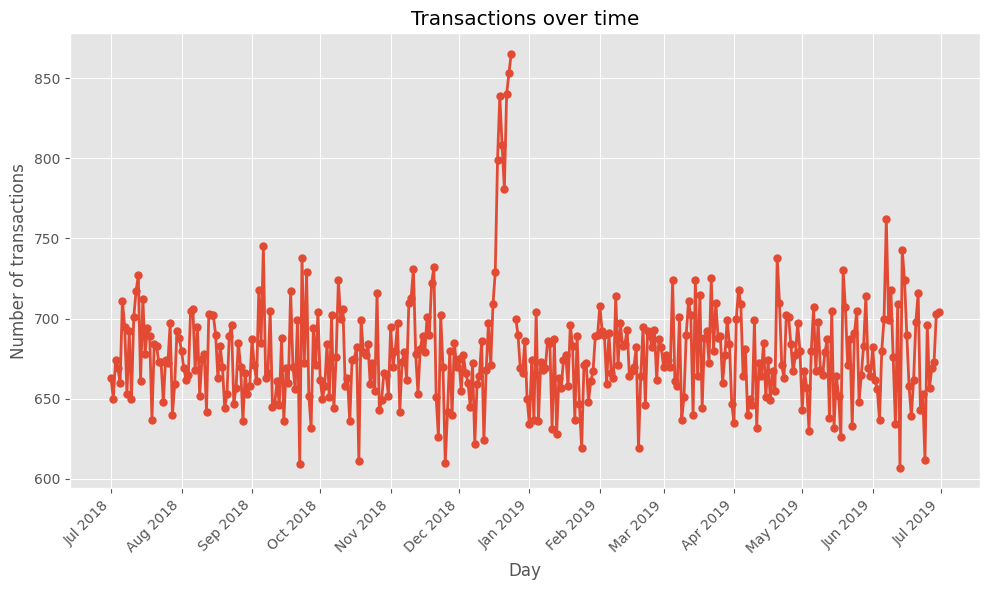

In [21]:
# Plot graph to show where the missing date is
# Set the plot style to a white background with black gridlines
plt.style.use('ggplot')

# Plot transactions over time
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(transactionsPerDay['DATE'], transactionsPerDay['N'], '-o', linewidth=2, markersize=5)

# Set axis labels and title
plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time")

# Format the x-axis for monthly breaks
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

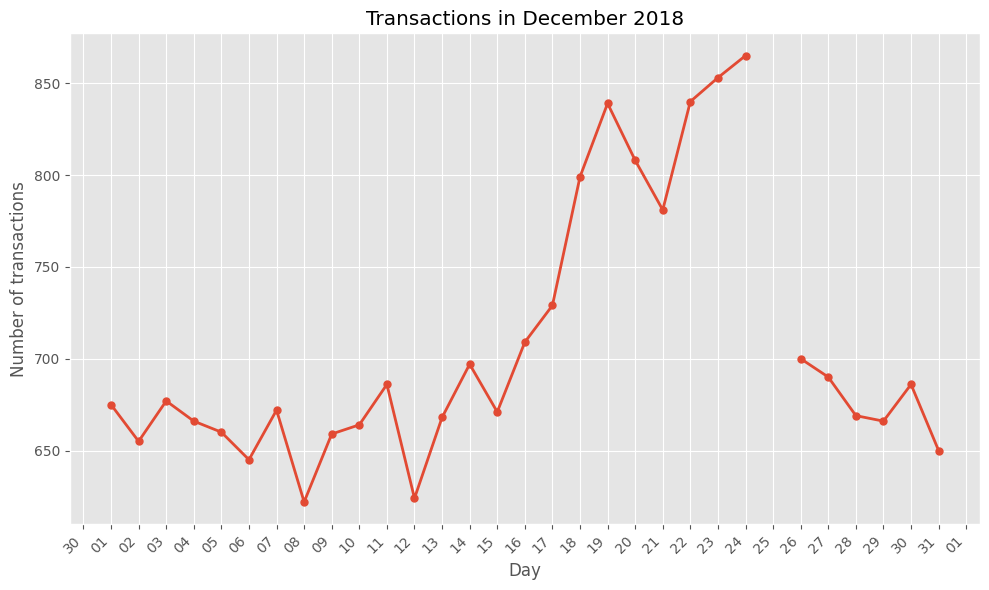

In [22]:
# We can see that the missing value is in December 2018, so let us filter only for the december month
december_data = transactionsPerDay[(transactionsPerDay['DATE'] >= '2018-12-01') & (transactionsPerDay['DATE'] <= '2018-12-31')]
# Plot transactions for December 2018
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['N'], '-o', linewidth=2, markersize=5)
plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions in December 2018")

# Format the x-axis for daily breaks
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [23]:
# Create column of the packet size for each transaction
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].apply(lambda x : int(''.join(filter(str.isdigit, x))))
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


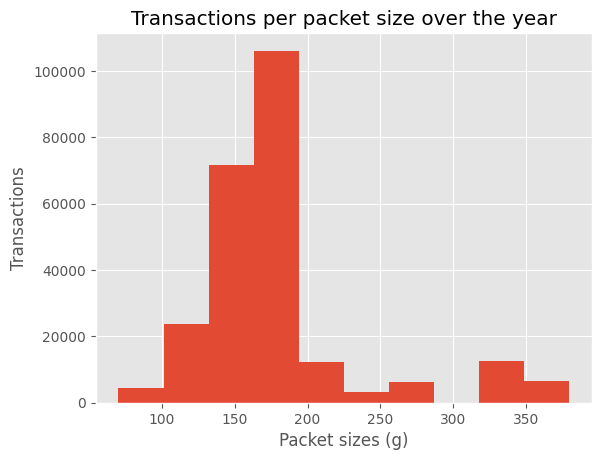

In [24]:
# Plot bargraph based on the transactions by packet size
plt.hist(transactionData['PACK_SIZE'])
plt.xlabel('Packet sizes (g)')
plt.ylabel('Transactions')
plt.title('Transactions per packet size over the year')
plt.show()

In [25]:
# Create a brand name column in transactionData
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split(' ').str[0]
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [26]:
# Examine brand names for cleaning
transactionData['BRAND'].value_counts(sort=False, ascending=True)

BRAND
Natural        6050
CCs            4551
Smiths        27390
Kettle        41288
Grain          6272
Doritos       22041
Twisties       9454
WW            10320
Thins         14075
Burger         1564
NCC            1419
Cheezels       4603
Infzns         3144
Red            4427
Pringles      25102
Dorito         3183
Infuzions     11057
Smith          2963
GrnWves        1468
Tyrrells       6442
Cobs           9693
French         1418
RRD           11894
Tostitos       9471
Cheetos        2927
Woolworths     1516
Snbts          1576
Sunbites       1432
Name: count, dtype: int64

In [27]:
# Replace duplicate brands that have been named differently
transactionData['BRAND'].replace('Dorito', 'Doritos', inplace=True)
transactionData['BRAND'].replace('Red', 'RRD', inplace=True)
transactionData['BRAND'].replace('Infzns', 'Infuzions' ,inplace=True)
transactionData['BRAND'].replace('Snbts', 'Sunbites' ,inplace=True)
transactionData['BRAND'].replace('WW', 'Woolworths' ,inplace=True)
transactionData['BRAND'].replace('Natural', 'NCC' ,inplace=True)

In [28]:
# Rexamine brand list after cleaning
transactionData['BRAND'].value_counts(sort=False, ascending=True)

BRAND
NCC            7469
CCs            4551
Smiths        27390
Kettle        41288
Grain          6272
Doritos       25224
Twisties       9454
Woolworths    11836
Thins         14075
Burger         1564
Cheezels       4603
Infuzions     14201
RRD           16321
Pringles      25102
Smith          2963
GrnWves        1468
Tyrrells       6442
Cobs           9693
French         1418
Tostitos       9471
Cheetos        2927
Sunbites       3008
Name: count, dtype: int64

## Explore Customer Dataset

In [29]:
# Examine structure and size of data
customerData

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [30]:
# Search for null values
customerData.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [31]:
# Examine dataframe info
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
# Merge the dataframes into 1
data = transactionData.merge(customerData, on="LYLTY_CARD_NBR")
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [33]:
# Check for missing values
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [34]:
data.to_csv('full_transaction_data.csv')

# Data Analysis

- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is

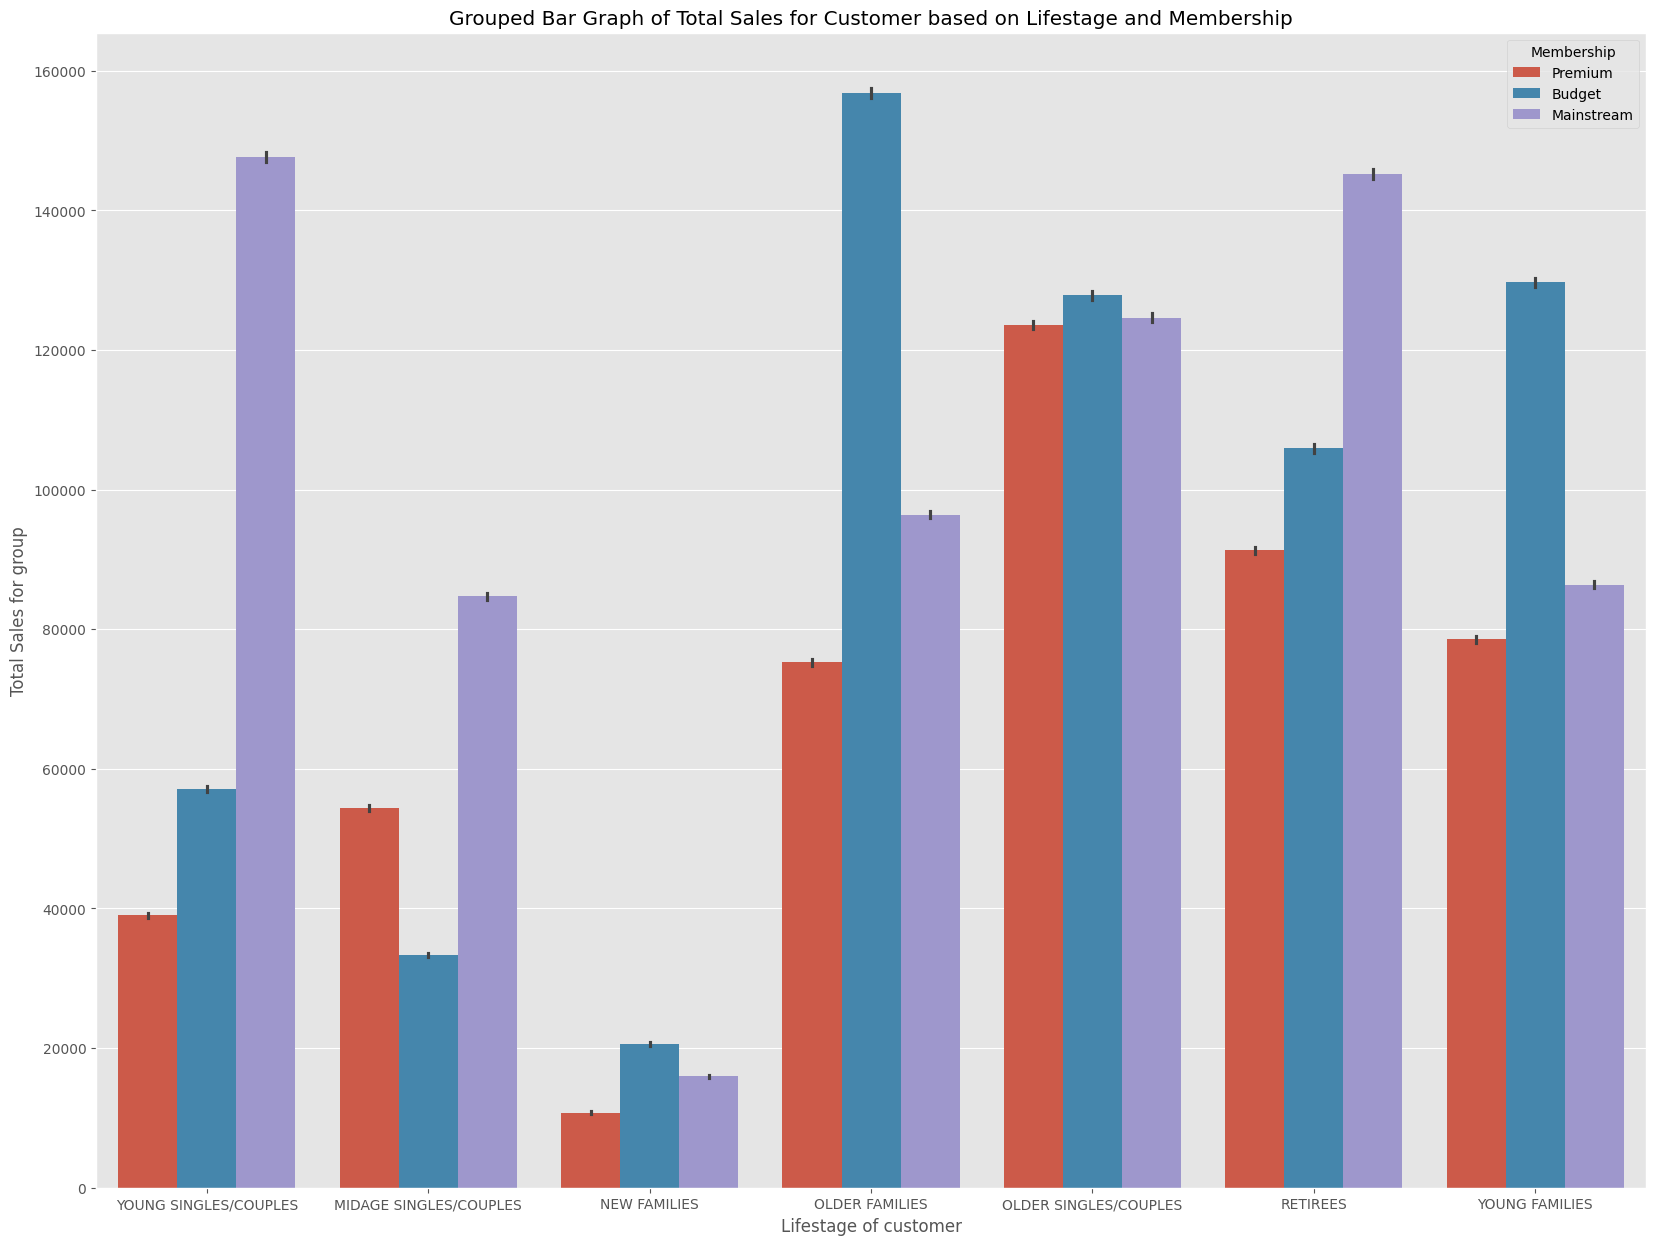

In [37]:
# Create the bar graph
plt.figure(figsize=(20,15))
sns.barplot(data, x ="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", estimator=sum)

# Customize the graph
plt.xlabel('Lifestage of customer')
plt.ylabel('Total Sales for group')
plt.title('Grouped Bar Graph of Total Sales for Customer based on Lifestage and Membership')
plt.legend(title='Membership')

- How many customers are in each segment

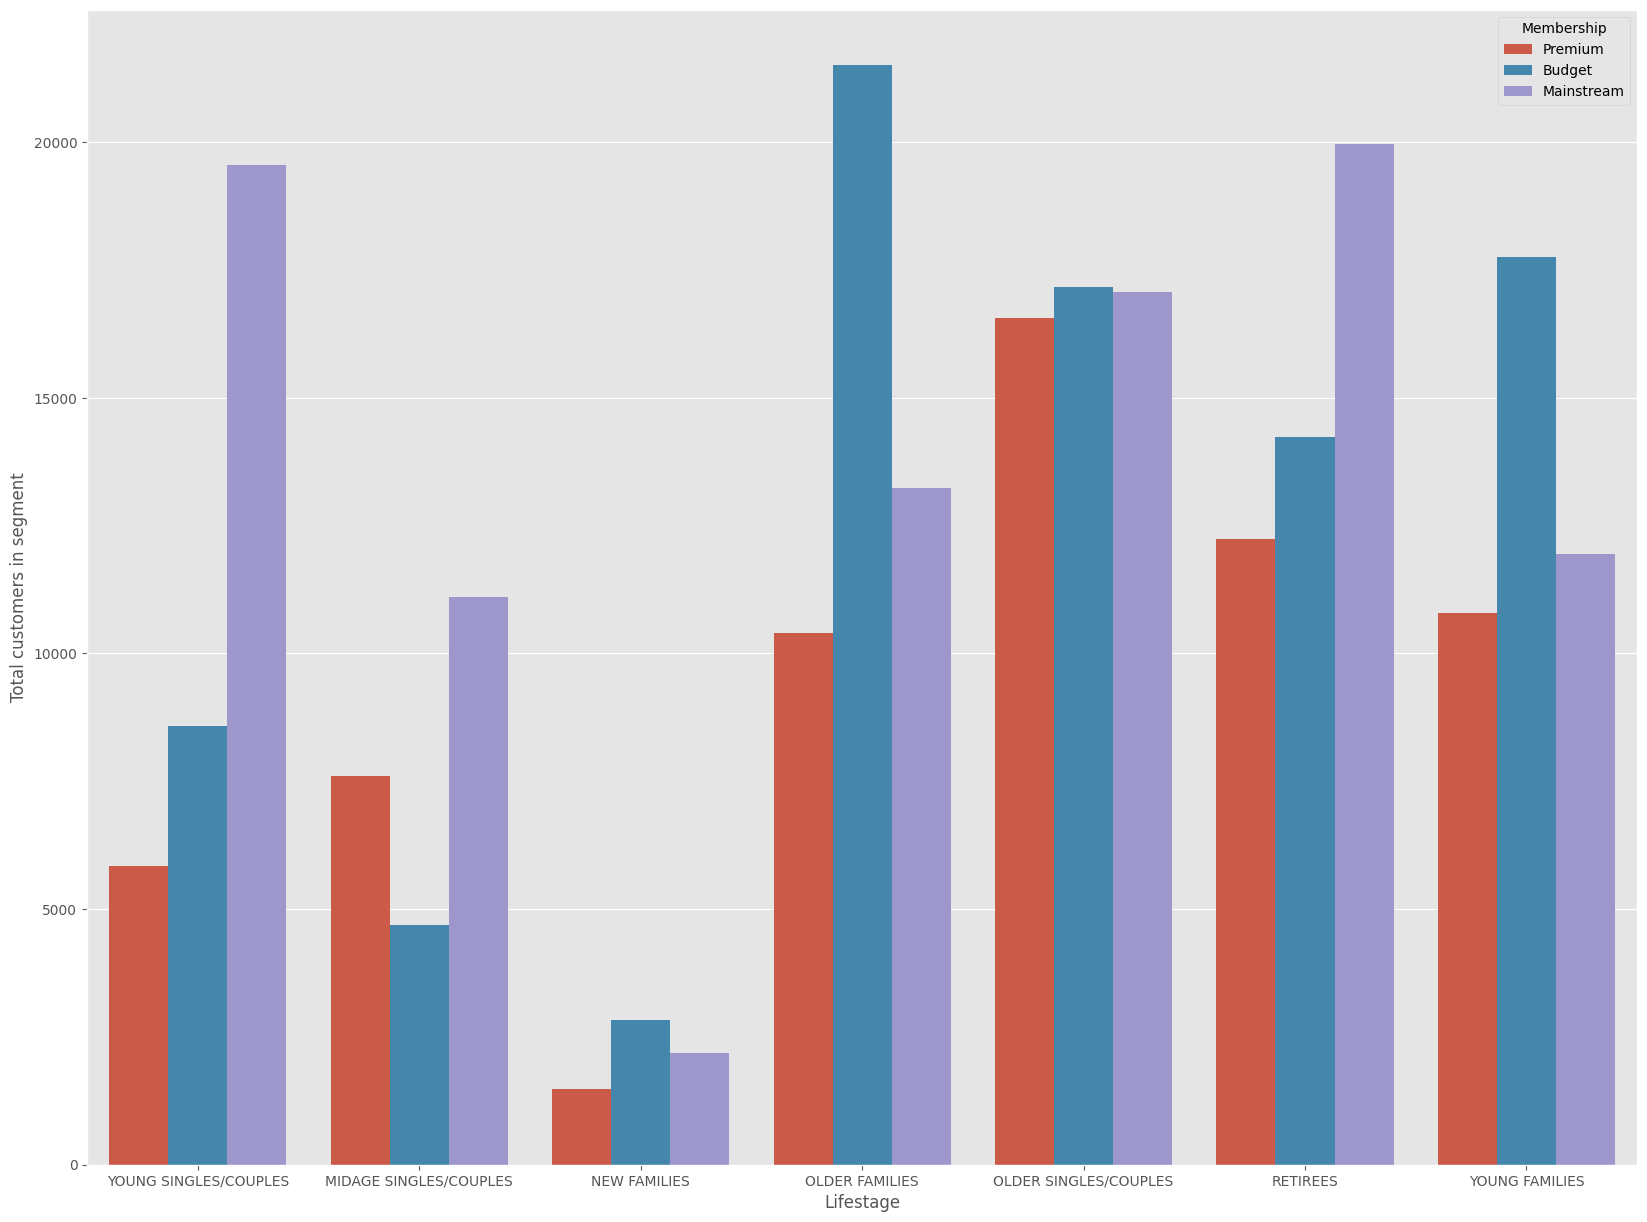

In [44]:
# Create histogram
plt.figure(figsize=(20,15))
sns.countplot(data, x='LIFESTAGE', hue='PREMIUM_CUSTOMER')

# Customize graph
plt.xlabel('Lifestage')
plt.ylabel('Total customers in segment')
plt.legend(title='Membership')

- How many chips are bought per customer by segment

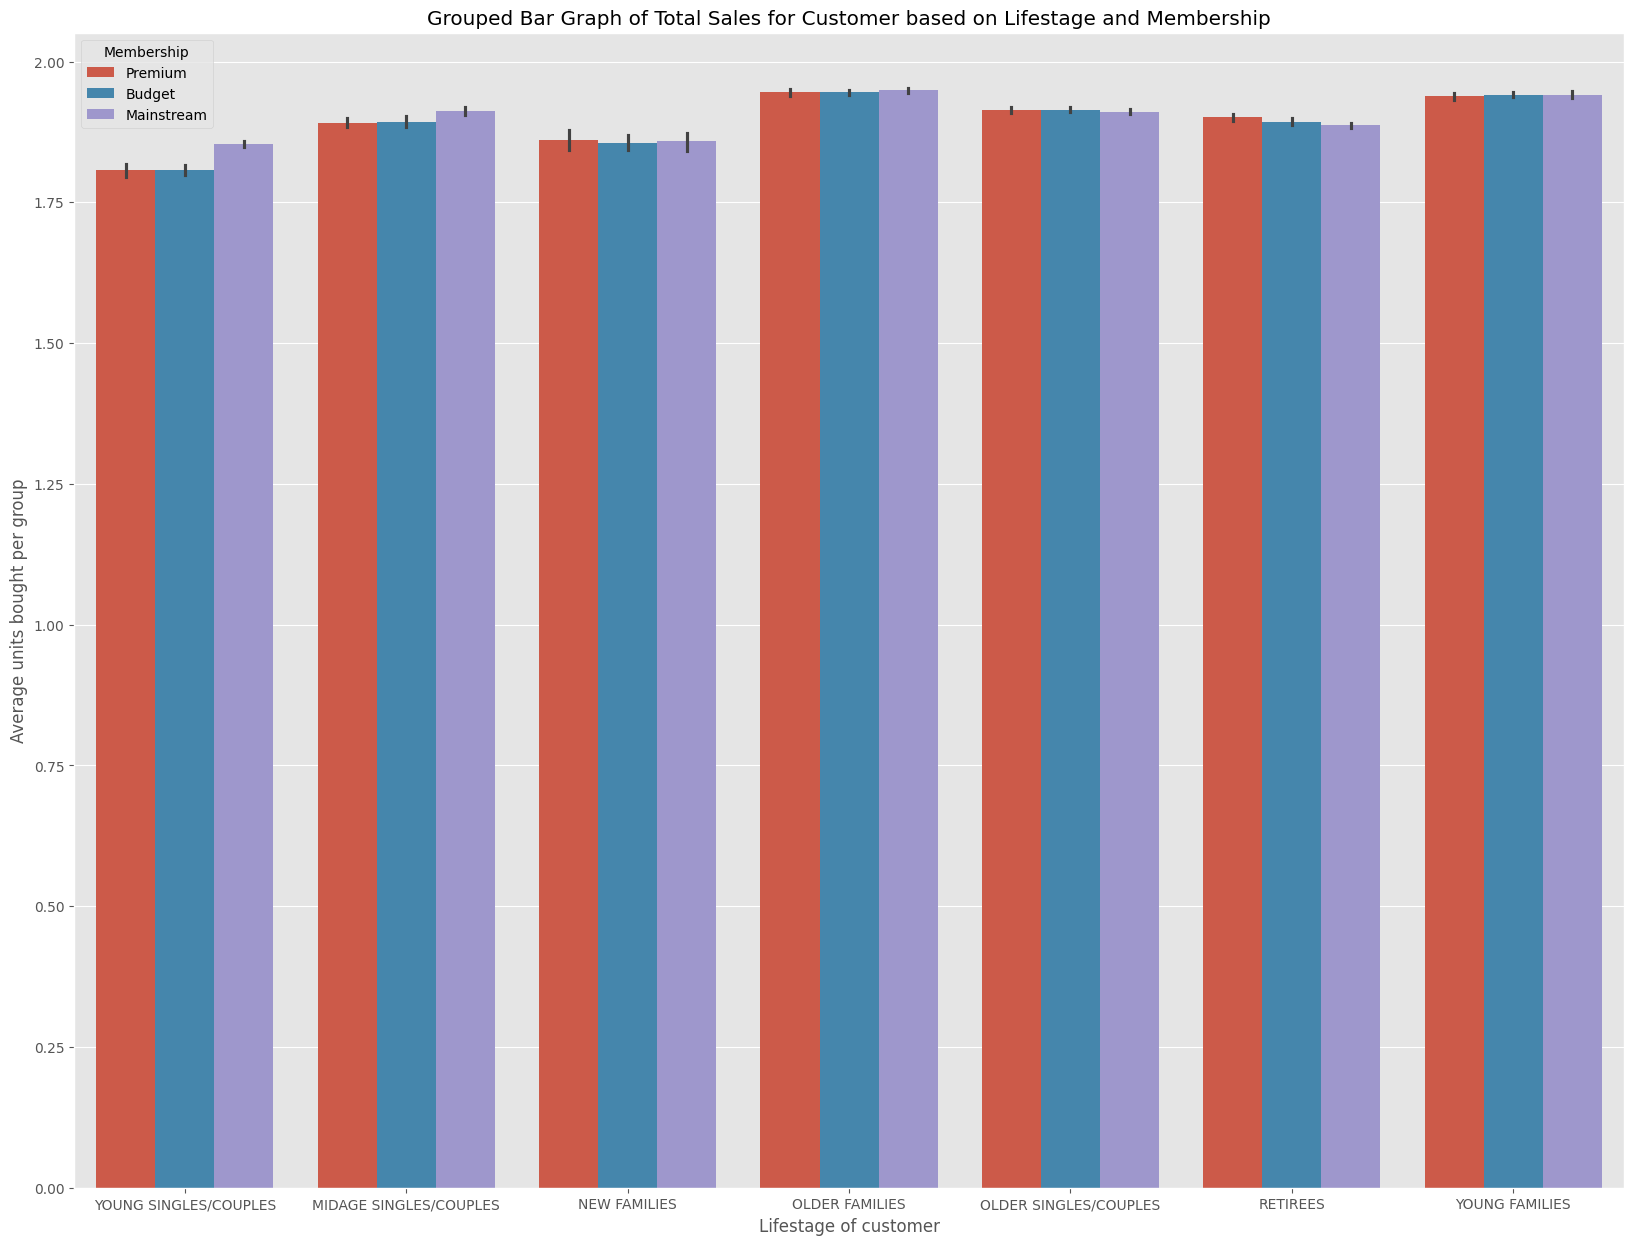

In [48]:
plt.figure(figsize=(20,15))
sns.barplot(data, x ="LIFESTAGE", y="PROD_QTY", hue="PREMIUM_CUSTOMER", estimator='mean')

# Customize the graph
plt.xlabel('Lifestage of customer')
plt.ylabel('Average units bought per group')
plt.title('Grouped Bar Graph of Total Sales for Customer based on Lifestage and Membership')
plt.legend(title='Membership')


- What's the average chip price by customer segment